In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

In [3]:
debussy_file = "audios/debussy.wav"
redhot_file = "audios/redhot.wav"

In [4]:
## Loading the files

debussy, sr = librosa.load(debussy_file)
redhot, _ = librosa.load(redhot_file)

## Extracting Spectograms

In [5]:
FRAME_SIZE = 2048
HOP_LENGTH = 512

In [6]:
debussy_spec = librosa.stft(debussy,n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)
redhot_spec = librosa.stft(redhot,n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)

In [8]:
debussy_spec.shape    

(1025, 1292)

## Calculating the Band Energy Ratio (BER)



In [39]:
def  split_freq_bins(spectogram, split_freq, sr):
    frequency_range = sr / 2   ## Nyquist Frequency
    ### Calculating delta freq btw adjacent freq bins
    freq_delta_per_bin = frequency_range / spectogram.shape[0]
    split_freq_bins = np.floor(split_freq / freq_delta_per_bin)   
    return int(split_freq_bins)

In [40]:
split_freq_bin = split_freq_bins(debussy_spec,
                split_freq=2000,   ## generally used split freq
               sr=sr)
split_freq_bin 

185

In [41]:
def band_eng_ratio(spectorgram, split_freq, sr):
    split_freq_bin = split_freq_bins(spectorgram, split_freq, sr)
    
    ## Move to the power spectogram
    power_spec = np.abs(spectorgram) ** 2
    ## we need to iterate the power spec , frame by frame , so doing transpose
    power_spec = power_spec.T
    
    band_energy_ratio = []
    
    # calculating BER per frame
    for freqs_in_frame in power_spec:
        sum_power_low_freqs = np.sum(freqs_in_frame[:split_freq_bin])
        sum_power_high_freqs = np.sum(freqs_in_frame[split_freq_bin:])
        BER_cur_frame = sum_power_low_freqs / sum_power_high_freqs
        band_energy_ratio.append(BER_cur_frame)
    
    return np.array(band_energy_ratio)

In [42]:
BER_debussy = band_eng_ratio(debussy_spec, split_freq=2000, sr=sr)

In [44]:
BER_debussy.shape

(1292,)

In [45]:
BER_redhot = band_eng_ratio(redhot_spec, split_freq=2000, sr=sr)
BER_redhot.shape

(1292,)

## Visualizing the BER Curves

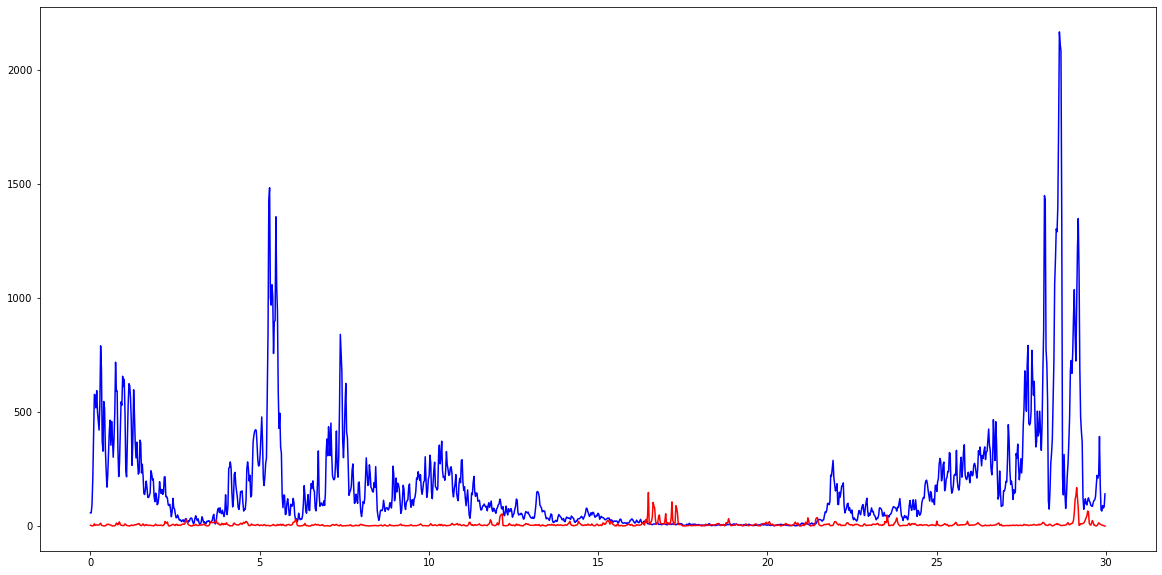

In [51]:
plt.figure(figsize=(20,10))

frames = range(len(BER_debussy))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.plot(t, BER_debussy, color='blue')
plt.plot(t, BER_redhot, color='red')
plt.show()

## This we can find when we compare classical music to rock music
